In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

## 0) utils

In [2]:
def plot_ensemble_preds(imgs, idx, M, preds_all=None, pix_std=None):
    for i in idx:
        fig, axs = plt.subplots(1, M + 2, figsize=(20, 4))
        for m in range(M):
            axs[m].imshow(np.transpose(imgs[m, i], (1,2,0)))
            axs[m].set_title(f"m={m}")
            if preds_all is not None:
                axs[m].set_title(f"{preds_all[m, i]}")
            axs[m].axis("off")
        axs[M].imshow(np.transpose(np.mean(imgs[:, i], axis=0), (1, 2, 0)))
        axs[M].set_title("mean-per-pixel")
        axs[M].axis("off")
        axs[M + 1].imshow(np.std(imgs[:, i], axis=0).mean(axis=0), cmap="gray")
        if pix_std is not None:
            axs[M + 1].set_title(f"std-per-pixel {pix_std[i]:.4f}")
        else:
            axs[M + 1].set_title("std-per-pixel")
        axs[M + 1].axis("off")

        plt.show()

## 1) Plot Ensemble Generations

In [9]:
import pickle

# with open('logs/bootstrapped_imagenet_5/certain_vs_uncertain/all_samples_b100.pkl', 'rb') as f:
# with open('logs/bootstrapped_imagenet_5/certain_vs_uncertain/all_samples_100_991.pkl', 'rb') as f:
with open('logs/bootstrapped_imagenet_5/certain_vs_uncertain/all_samples_100_854.pkl', 'rb') as f:
# with open('logs/bootstrapped_imagenet_5/certain_vs_uncertain/all_samples_b1.pkl', 'rb') as f:
    data = pickle.load(f)


In [10]:
data = data.cpu().numpy()
data = np.transpose(data, (1, 0, 2, 3, 4))

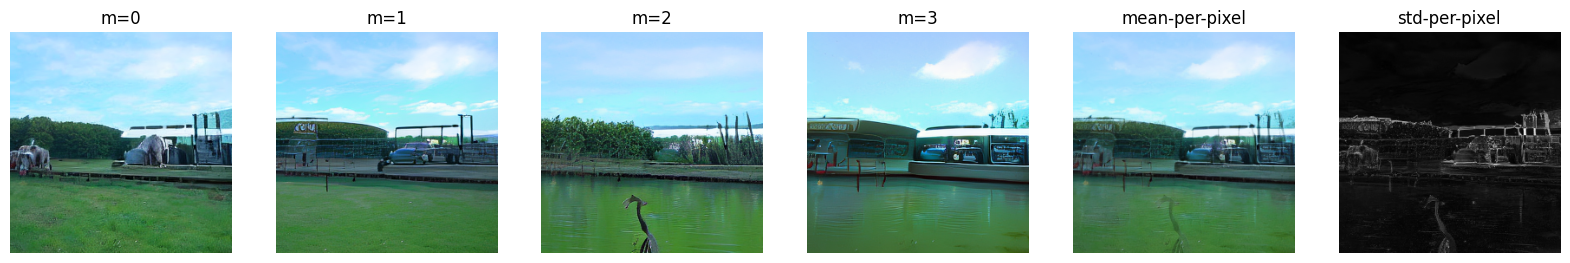

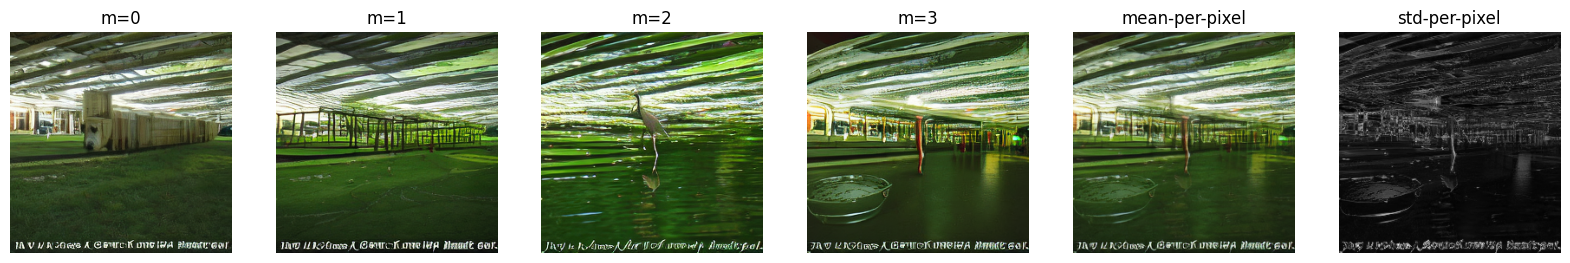

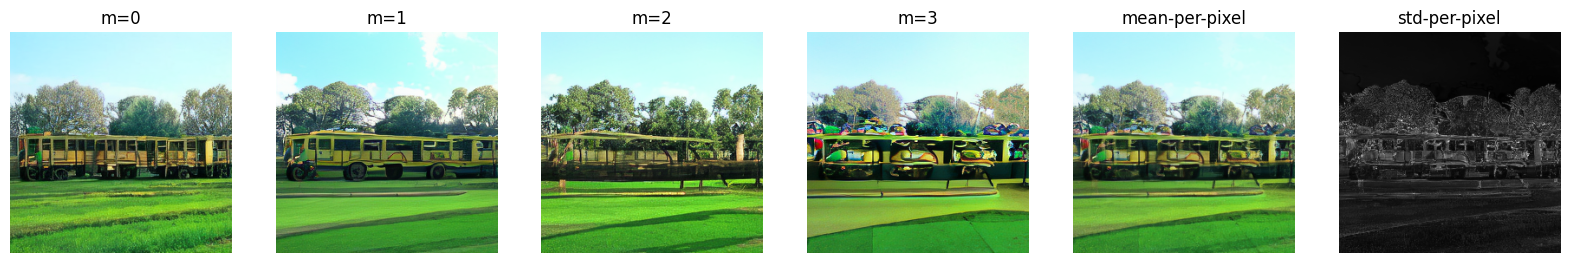

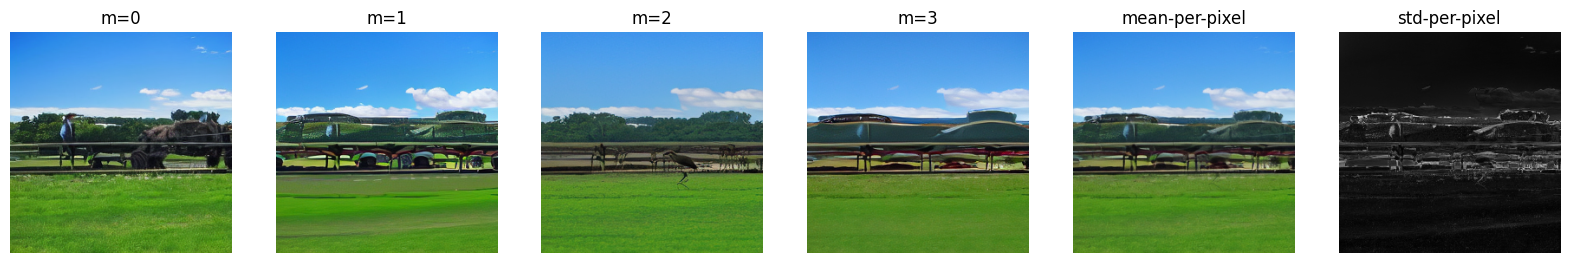

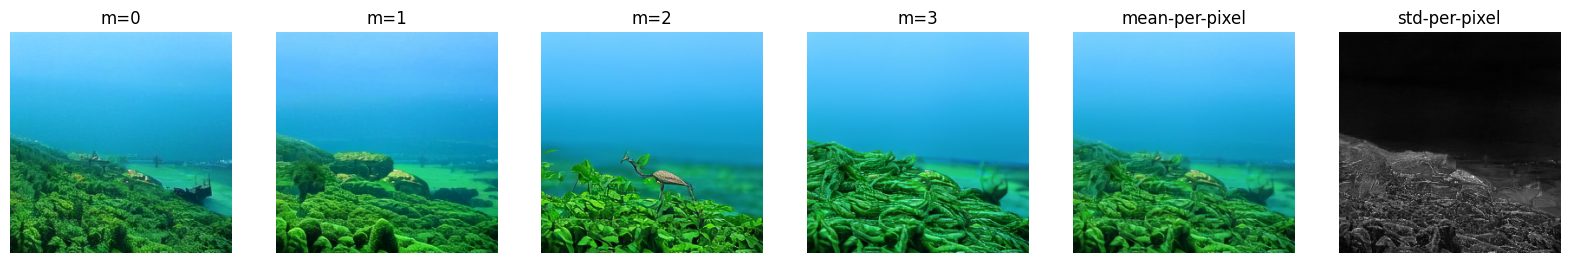

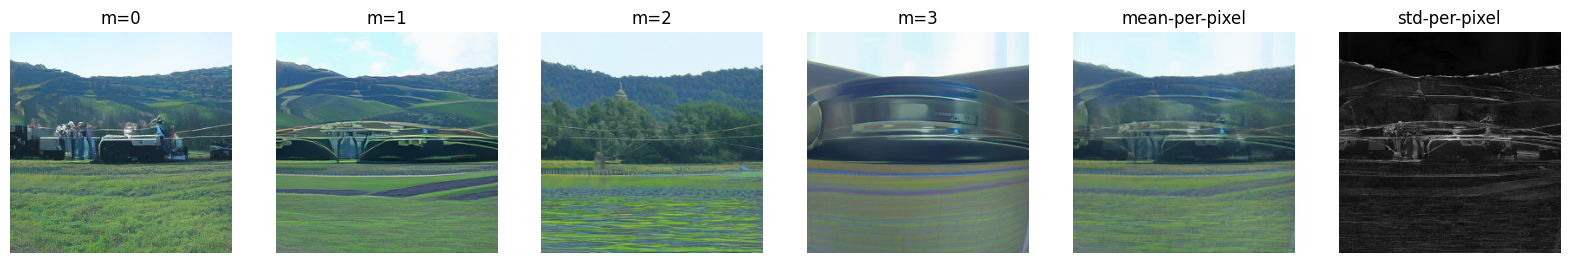

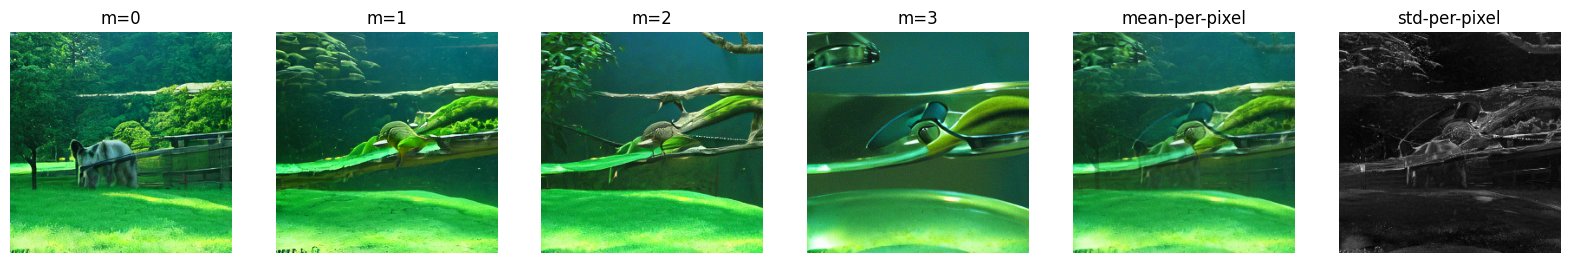

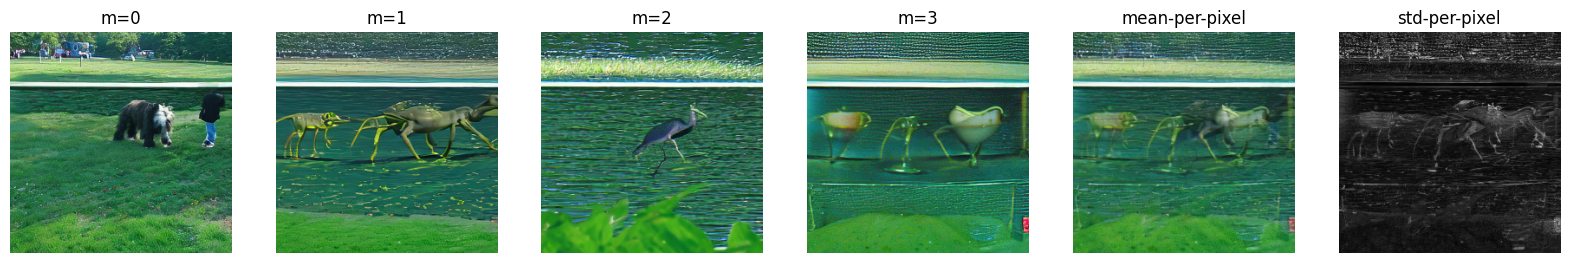

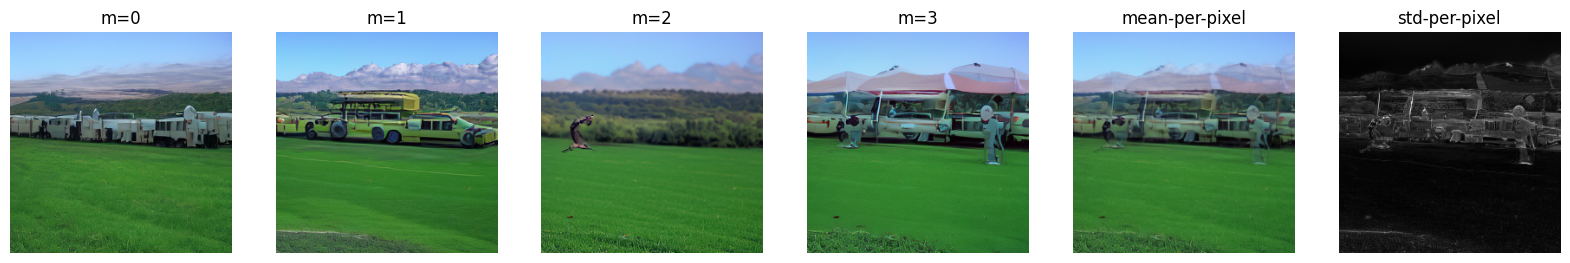

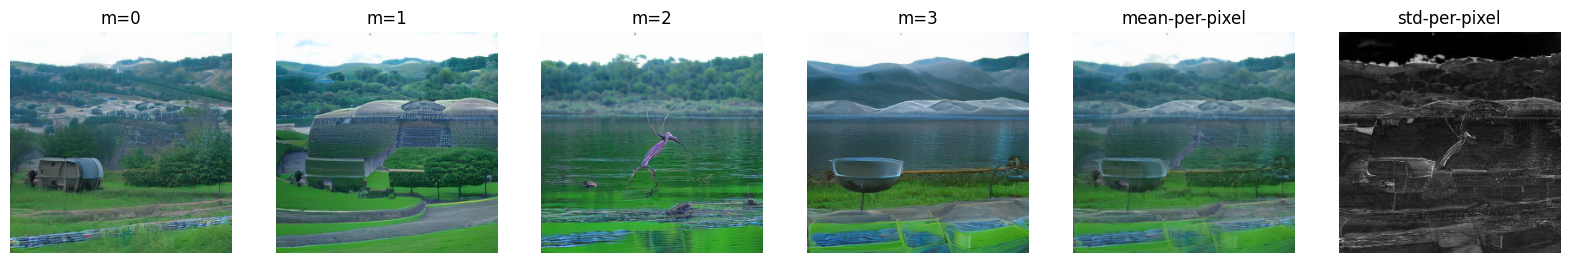

In [11]:
idx = np.random.choice(data.shape[1], 10, replace=False)

plot_ensemble_preds(data, idx=idx, M=4)
# plot_ensemble_preds(data, idx=idx_sorted[:25], M=4)
# plot_ensemble_preds(data, idx=idx_sorted[::-1][:25], M=4)

## 2) Plot Best and Worst Generations (based on epistemic uncertainty)

In [11]:
# img_path = "logs/bootstrapped_imagenet_5/certain_vs_uncertain/all_samples_1/0/all_imgs.npy"
# img_path = "logs/bootstrapped_imagenet_5/certain_vs_uncertain/all_samples_100/0/all_imgs.npy"
img_path = "logs/bootstrapped_imagenet_5/certain_vs_uncertain/all_samples_100_991/0/all_imgs.npy"
imgs_de = np.load(img_path)

# cos_sim = np.load("logs/bootstrapped_imagenet_5/certain_vs_uncertain/all_samples_1/cos_sim.npy")
# cos_sim = np.load("logs/bootstrapped_imagenet_5/certain_vs_uncertain/all_samples_100/cos_sim.npy")
cos_sim = np.load("logs/bootstrapped_imagenet_5/certain_vs_uncertain/all_samples_100_991/cos_sim.npy")

idx_sorted = np.argsort(cos_sim)[::-1]

In [13]:
imgs_de.shape, idx_sorted.shape

((50, 3, 256, 256), (50,))

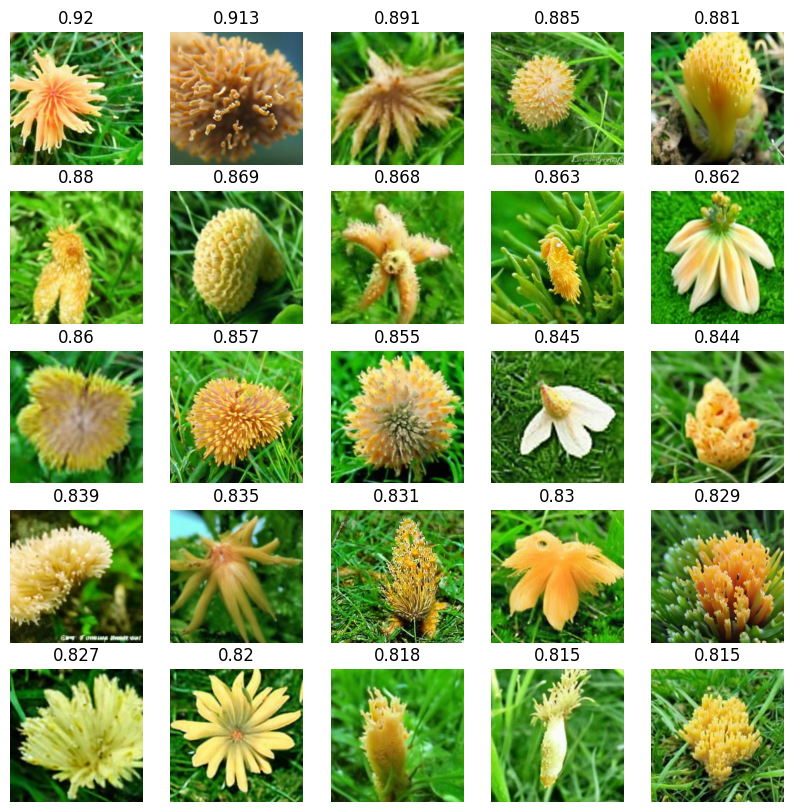

In [14]:
fig, axs = plt.subplots(5, 5, figsize=(10, 10))
k = 0
for i in range(5):
    for j in range(5):
        axs[i, j].imshow(np.transpose(imgs_de[idx_sorted[k]], (1, 2, 0)))
        axs[i, j].set_title(round(cos_sim[idx_sorted[k]], 3))
        axs[i, j].axis("off")
        k += 1

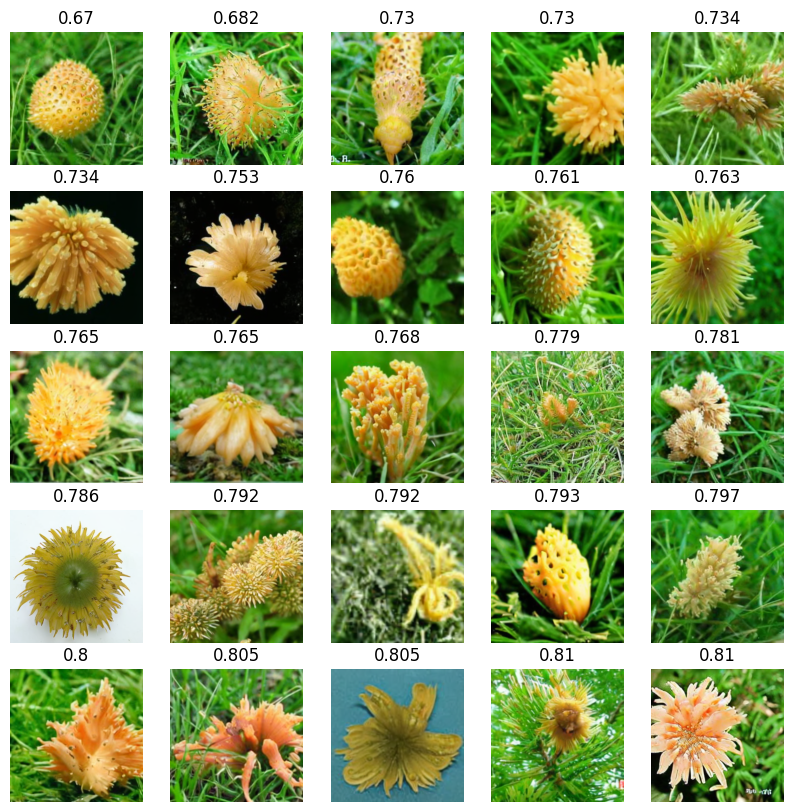

In [15]:
fig, axs = plt.subplots(5, 5, figsize=(10, 10))
k = 0
for i in range(5):
    for j in range(5):
        axs[i, j].imshow(np.transpose(imgs_de[idx_sorted[::-1][k]], (1, 2, 0)))
        axs[i, j].set_title(round(cos_sim[idx_sorted[::-1][k]], 3))
        axs[i, j].axis("off")
        k += 1